<a href="https://colab.research.google.com/github/chm10/MO443/blob/master/projeto1/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:**Christian Hideki Maekawa  - **RA:** 231867

# Introdução
O objetivo deste trabalho é implementar alguns filtros de imagens no domínio espacial. A filtragem aplicada a uma imagem digital é uma operação local que altera os valores de intensidade dos pixels da imagem levando-se em conta tanto o valor do pixel em questao quanto valores de pixels vizinhos. Para está atividade procurar testar os filtros e seus efeitos.


# O Programa
O programa foi implementado usando ubuntu 18.04 e python 3.6.9. As bibliotecas utilizadas para este trabalho foram numpy 1.18.5, matplotlib 3.2.2, opencv python 4.1.2.30. e pathlib 1.0.1.

A seguir coloquei os comandos para mostrar as configuração do ambiente.

In [1]:
!cat /etc/*release 

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [2]:
!python --version

Python 3.6.9


## Como executar
O programa foi desenvolvido para ser executado com o ambiente Colab. Para executar a célula é necessário pressionar `Shift` + `Enter` para cada célula ou pressionar o botão de executar que fica na parte superior esquerda de cada célula.

Algumas vantagens de utilizar o Colab. 
* O código roda num ambiente isolado (ubuntu) usando internet externo;
* Para pessoas sem internet rápida ou computador bom é uma ótima solução;
* Vem com vários pacotes pré instalado evitando problema de instalação e configuração de ambiente;
* Ele executa comandos Ubuntu;
* Podemos baixar repositório do github e instalar o pacote que estiver sendo desenvolvido;
* Facilmente vinculado ao Github e Google drive.

Alguns exclarecimentos sobre alguns códigos.
 
O comando `%%capture` suprime o output, `import sys` será utilizado para verificar se o usuário está executando no Colab ou no jupyter(local).

O caracter `!` indica ao Colab que está executado um comando do ubuntu. 

Ao final do código terá esse código para comprimir e baixar as imagens em um arquivo `.zip`.


## Entrada
Imagens baixadas utilizando o wget do Colab. Essas imagens estarão disponível no ambiente do Colab para processamento. As imagens foram baixados do  $\href{http://www.ic.unicamp.br/~helio/imagens_png/}{link}$.

## Saída
O Programa gera uma imagem que é possível de ser baixado utilizando atalho `Shift` + `Botão direita` >> `Salvar como ...` no formato png. Ao final da seção de código existe um comando para baixar todas as imagens.

# Parâmetros Utilizados
Foram utilizadas imagens extraidas do site. Essas imagens são convertidas para formato vetorizado usando a biblioteca do opencv e servirá de paramêtros para os programas. O filtro foi criado utilizando numpy e armazenado em um dict para as chamadas ficarem mais limpas.

# Solução

## Download das imagens

In [3]:
%%capture
import sys
if 'google.colab' in sys.modules:
  !wget https://www.ic.unicamp.br/~helio/imagens_png/baboon.png
  !wget https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png
  !wget https://www.ic.unicamp.br/~helio/imagens_png/city.png
  !wget https://www.ic.unicamp.br/~helio/imagens_png/house.png
  !wget https://www.ic.unicamp.br/~helio/imagens_png/seagull.png
  !rm -rf sample_data/
else:
  import wget
  wget.download("https://www.ic.unicamp.br/~helio/imagens_png/baboon.png")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_png/city.png")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_png/house.png")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_png/seagull.png")

## Bibliotecas utilizada

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

In [27]:
def loadImgs(metadata):
  """
  Essa função é responsável por carregar as imagens. Path do pathlib é utilizada para pegar todas 
  as imagens com final png da raiz "." o conteúdo vetorizado é armazenado na lista imgs. 
  E o nome dessa imagem fica salvo no dict como referencia na hora salvar.
  """
  imgs = []
  for i in Path('.').glob('*.png'):
    imgs.append(cv2.imread(f"./{i}", cv2.COLOR_BGR2GRAY)) # Carrega imagens
    if 'files' in metadata.keys():
      pass
    else:
      metadata['files'] = []
    metadata['files'].append(i.stem) # Guarda informações das imagens
  return imgs, metadata

def custom_plot(imgs,legend="Plot",_filter=np.array([]),figsize=(15,15),metadata={}):
  """
  Essa função foi criado para fazer o plot. Ele tem como parâmetro de entrada o nome da legenda, o 
  filtro que pode ser opcional caso queira fazer os plots sem filtro, tamanho da imagem e metadata que
  contém informações adicionais para salvar imagens.
  Essa função exibe a imagem e gera é responsável por gerar o output do png.
  A função clip faz o ajuste da escala para 0 até 255.
  Em especial o h12 tem um tratamento especial envolver operações com filtro foi utilizado lambda.
  """
  assert type(figsize) == tuple, "figsize tem que ser tupla"
  assert type(legend) == str, "legend precisa ser string"
  imgs = imgs.copy()
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),sharex=True, sharey=True) # Inicializa
  fig.suptitle(legend)
  fig.set_size_inches(figsize[0],figsize[1])
  _filter_fun = _filter
  if type(_filter) == type(lambda:x):# Etapa para verificar se é um filtro h12
    _filter = np.array([1])
  if len(_filter) > 0 :
    for idx,img in enumerate(imgs):
      if type(_filter_fun) == type(lambda:x):# Etapa para verificar se é um filtro h12
        imgs[idx] = np.clip(_filter_fun(img),0,255)
      else:
        imgs[idx] = np.clip(cv2.filter2D(img,-1,cv2.flip(_filter, -1), borderType=cv2.BORDER_CONSTANT),0,255) # só aplica o filtro
      if 'files' in metadata.keys(): # escreve imagens
        filename = f"{metadata['files'][idx]}_{metadata['filter']}.png"
        cv2.imwrite(filename,imgs[idx])
  for ax, img in zip(fig.get_axes(),imgs): # exibe imagens
    if ax != ax6:
      ax.imshow(img, cmap="gray")
      ax.label_outer()
      ax.set_xticks([]), ax.set_yticks([])

def loading_filter():
  """
  Essa função foi utilizada para criar os filtros e armazenar em um dict. Foi criada dessa maneira para praticar
  o uso do numpy. Mas poderia ser feito com np.array([...]) depois feito o reshape que ficaria mais fácil.
  """
  _filters =  {}
  _filters['h1'] = np.zeros((5,5))
  _filters['h1'][1,1] = -1 
  _filters['h1'][1,3] = -1 
  _filters['h1'][3,1] = -1 
  _filters['h1'][3,3] = -1 
  _filters['h1'][2] = np.array([-1,-2,16,-2,-1])
  _filters['h1'][:,2] = _filters['h1'][2]

  _filters['h2'] = np.ones((5,5))
  _filters['h2'][0] = np.array([1,4,6,4,1])
  _filters['h2'][-1] = _filters['h2'][0] 
  _filters['h2'][1] =  np.array([4,16,24,16,4])
  _filters['h2'][-2] = _filters['h2'][1]
  _filters['h2'][2] = np.array([6,24,36,24,6])
  _filters['h2'] =  _filters['h2']/256

  _filters['h3'] = np.zeros((3,3))
  _filters['h3'][:,0] = -1*np.array([1,2,1])
  _filters['h3'][:,-1] = -1*_filters['h3'][:,0]

  _filters['h4'] = _filters['h3'].T

  _filters['h5'] = -1*np.ones((3,3))
  _filters['h5'][1,1] *= -8

  _filters['h6'] = np.ones((3,3))
  _filters['h6'] /= 9

  _filters['h7'] = -1*np.ones((3,3))
  _filters['h7'] += np.diag([3,3,3])
  _filters['h7'] = np.rot90(_filters['h7'])

  _filters['h8'] = np.rot90(_filters['h7'])

  _filters['h9'] = np.diag([1]*9)/9

  _filters['h10'] = np.ones((5,5))*-1
  _filters['h10'] += np.diag([0,3,9,3,0])
  _filters['h10'] = np.rot90(_filters['h10'])
  _filters['h10'] += np.diag([0,3,0,3,0])
  _filters['h10'][2] += np.array([0,3,0,3,0])
  _filters['h10'][:,2]  += np.array([0,3,0,3,0])
  _filters['h10'] /= 8

  _filters['h11'] = np.zeros((3,3))
  _filters['h11'][0] = np.array([-1,-1,0])
  _filters['h11'][:,0] = _filters['h11'][0]
  _filters['h11'][2] = _filters['h11'][0][::-1]*-1
  _filters['h11'][:,2] = _filters['h11'][0][::-1]*-1

  _filters['h12'] = lambda x: (np.sqrt(cv2.filter2D(x,-1,cv2.flip(_filters['h3'], -1), borderType=cv2.BORDER_CONSTANT)**2 + cv2.filter2D(x,-1,cv2.flip(_filters['h4'], -1), borderType=cv2.BORDER_CONSTANT)**2)).astype(np.uint8)
  return _filters

## Imagens Original
Nessa parte será apresentada a imagem original para comparação.
As imagens são transformada na escala de cinza  com `cv2.COLOR_BGR2GRAY`. E a função `custom_plot` é responsável por exibir customizadas todas as imagens  na escala de cinza. Essa parte também é inicializada a variável metadata para serem utilizadas na hora de salvar.

In [6]:
metadata = {}
imgs, metadata = loadImgs(metadata)

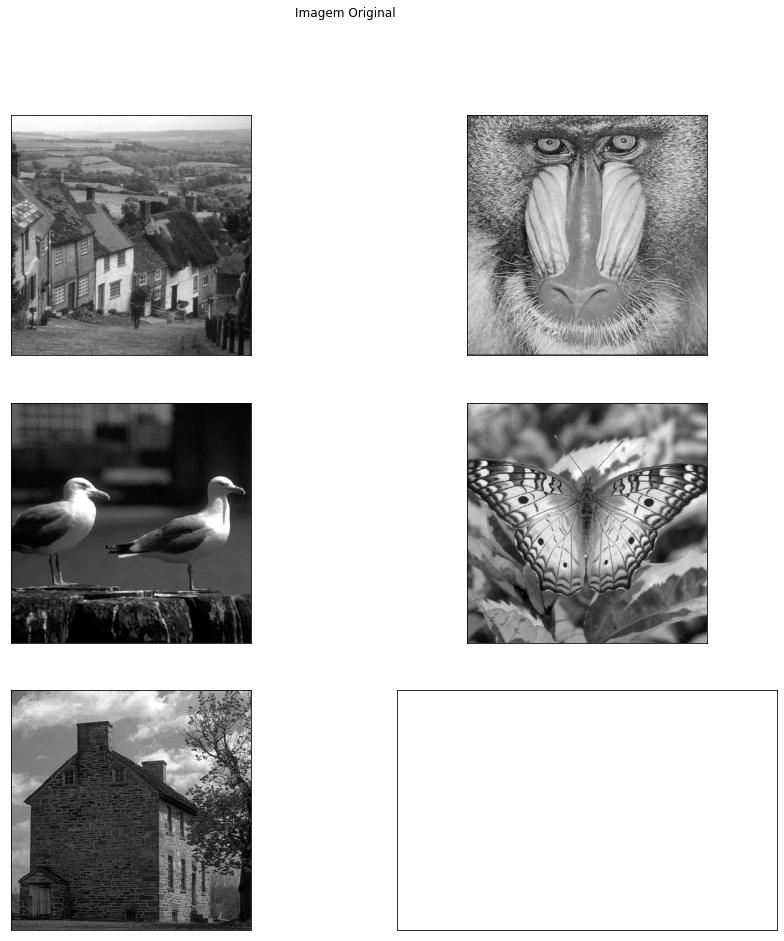

In [7]:
custom_plot(imgs,"Imagem Original")

## Carregar Filtros  
Nessa parte é inicilizada a variável `_filters` com os 12 filtros para acessar basta  utilizar `_filters['h1']`. Foi criada desta maneira para melhorar a vizualização dos resultados. Nas próximas seções serão apresentados os filtros.

In [28]:
_filters = loading_filter()

### Filtro de detecção de borda 
Filtro de detecção de bordas com Laplaciano do gaussiano com vizinhança 4, sem considerar as diagonais.O filtro laplaciano sozinho tem uma desvantagem por ser extremamente sensível ao ruído. Então aplicando suavização antes do laplaciano faz melhorar o resultado das imagens processadas. Em comparação ao filtro laplaciano h5 o h1 consegue identificar melhor alguns detalhes de borda que não ficam claras após o filtro h5.

Filtro h1 
[[ 0.  0. -1.  0.  0.]
 [ 0. -1. -2. -1.  0.]
 [-1. -2. 16. -2. -1.]
 [ 0. -1. -2. -1.  0.]
 [ 0.  0. -1.  0.  0.]]


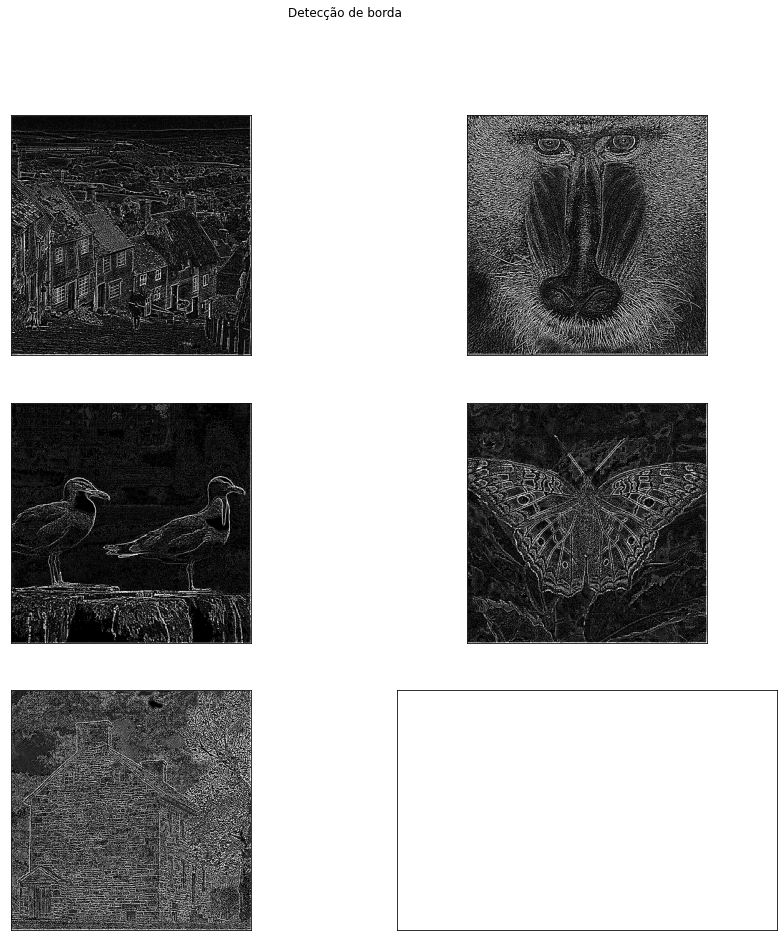

In [12]:
_filter = 'h1'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Detecção de borda",_filters[_filter],metadata=metadata)

### Filtro de embaçamento Gaussiano 5x5
Para embaçar a imagem é utilizado o filtro de *Gaussian blur*. Ele reatribui cada pixel com a soma dos pesos dos pixels vizinhos. Os filtros gaussianos implementados em python costumam ter um sigma que com seu aumento proporciona o aumento do tamanho do filtro, intensificando o efeito de enbaçamento sobre a imagem. Se tem mais vizinhos influenciando no pixel a ser processado maior é o efeito do embaçamento. 

In [13]:
_filter = 'h2'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Embaçamento Gaussiano 5x5",_filters[_filter],metadata=metadata)

Filtro h2 
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


### Filtro de detecção de borda  
Para detecção de bordas usando Sobel operator. O filtro é pequeno e rápido para ser processado e suaviza um pouco a imagem ficando mais robusto ao rúido quanto detecção de borda do que utilizando apenas o filtro laplaciano. Para esse trabalho foi utilizado filtro de sobel com operação vertical(h3) e com operação horizontal(h4). Para as imagens processada utilizando o h3 notou que houve realce vertical enquanto para h4 notou que houve um realce na horizontal. 


Filtro h3 
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


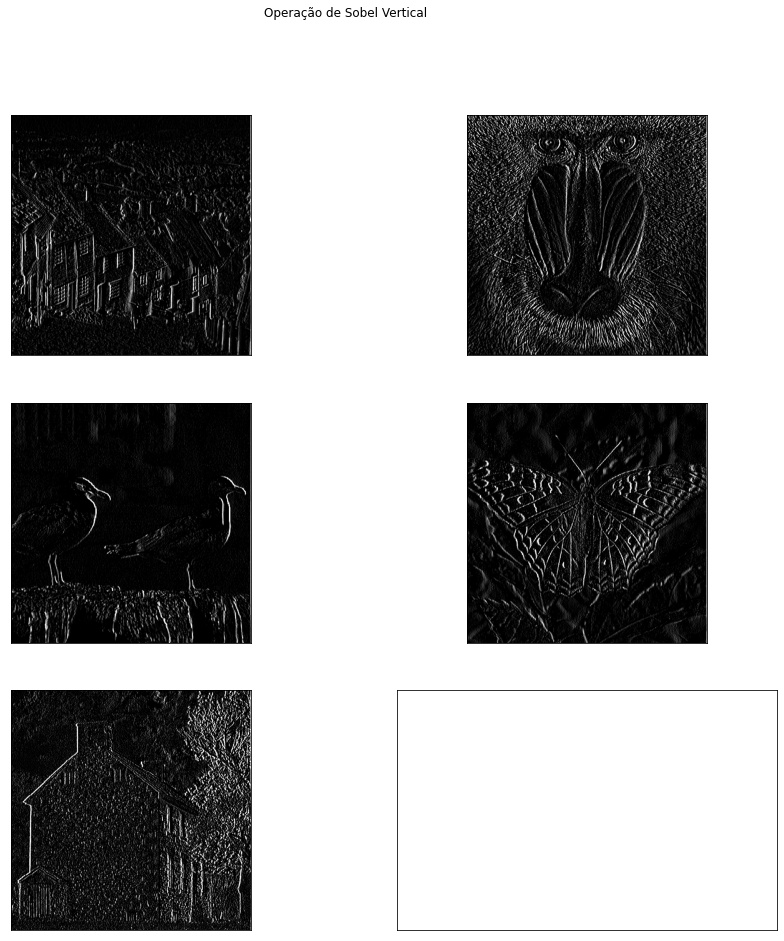

In [14]:
_filter = 'h3'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Operação de Sobel Vertical",_filters[_filter],metadata=metadata)

In [15]:
_filter = 'h4'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Operação de Sobel Horizontal",_filters[_filter],metadata=metadata)

Filtro h4 
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


### Deteção de bordas
Esse filtro é baseado em operação Laplaciano com vizinhança 8, abrangindo as diagonais. É calculado por meio da segunda ordem de derivação. Por essa característica, ele tem sensibilidade ao ruído. Para fazer essa correção geralmente é utilizado filtro gaussiano para reduzir nível do ruído antes de se aplicar o filtro com operação Laplaciano. É notado um alto nível de detalhamento nas bordas das imagens processadas.

Filtro h5 
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


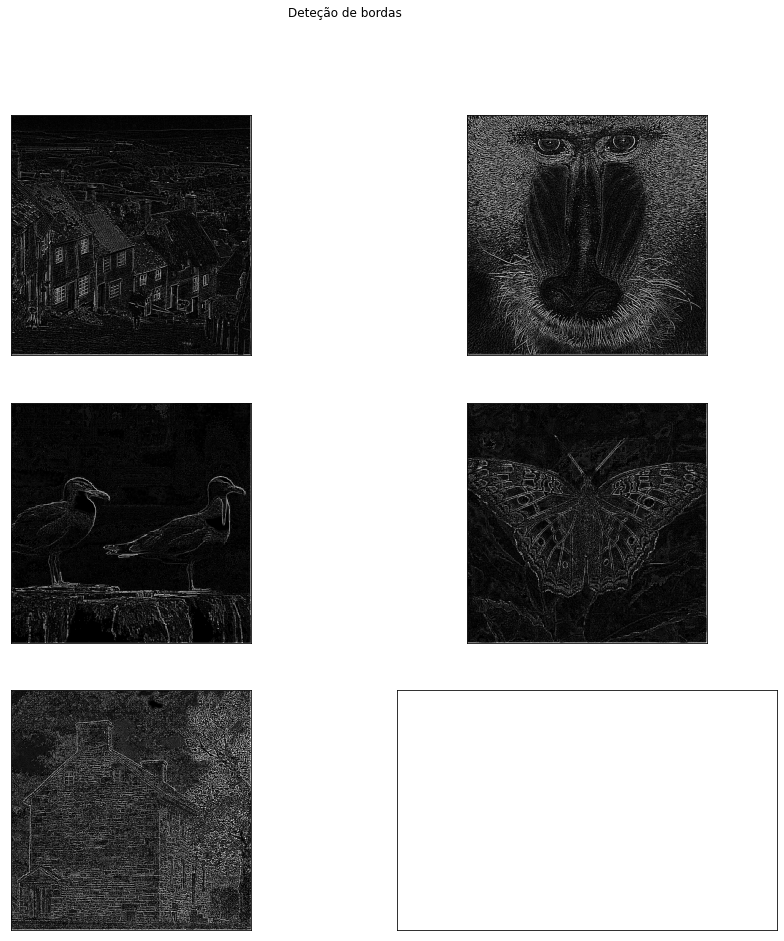

In [16]:
_filter = 'h5'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Deteção de bordas",_filters[_filter],metadata=metadata)

### Filtro de embaçamento
Filtro Box blur normalizado com vizinhança 8. O filtro aplica um efeito de média sobre o pixel central tornando ele ligeramente embaçado. Ele tem um custo operacional menor por ser uma média e normalização dos peso logo em seguida. 
O efeito de embaçamento é ligeramente pequeno comparado com h2 por causa do sigma.

Filtro h6 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


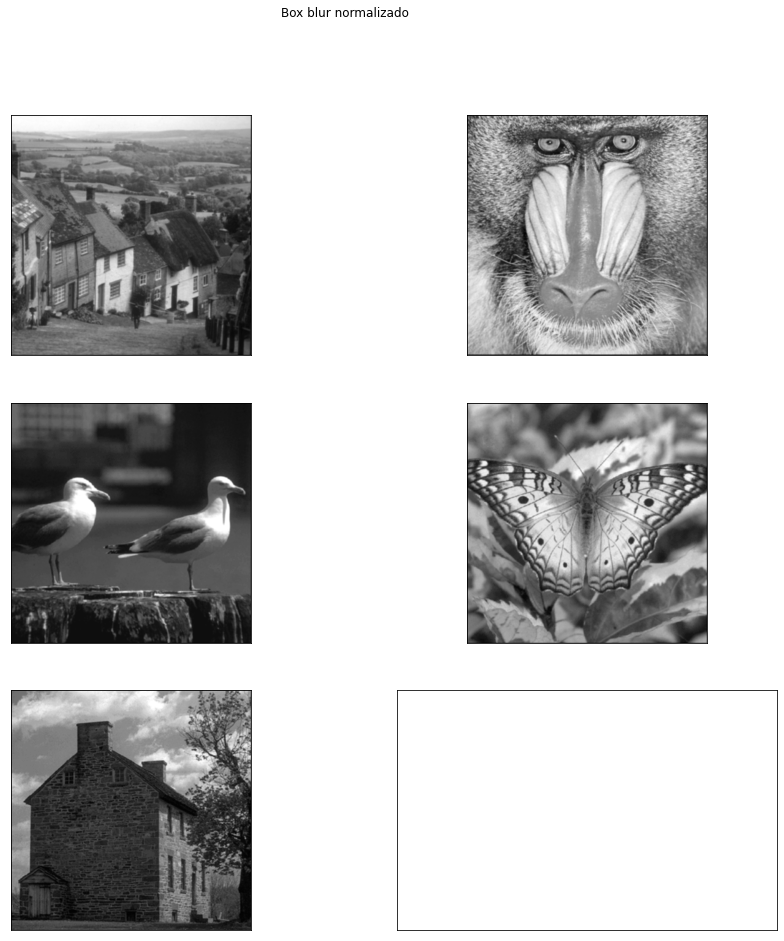

In [17]:
_filter = 'h6'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Box blur normalizado",_filters[_filter],metadata=metadata)

### Deteção de linha
O próximo filtro tem a propriedade de identificar linhas que estão a 45 graus. É notada nas imagens da árvore, pelagem do babuino e asa de borboleta.

Filtro h7 
[[-1. -1.  2.]
 [-1.  2. -1.]
 [ 2. -1. -1.]]


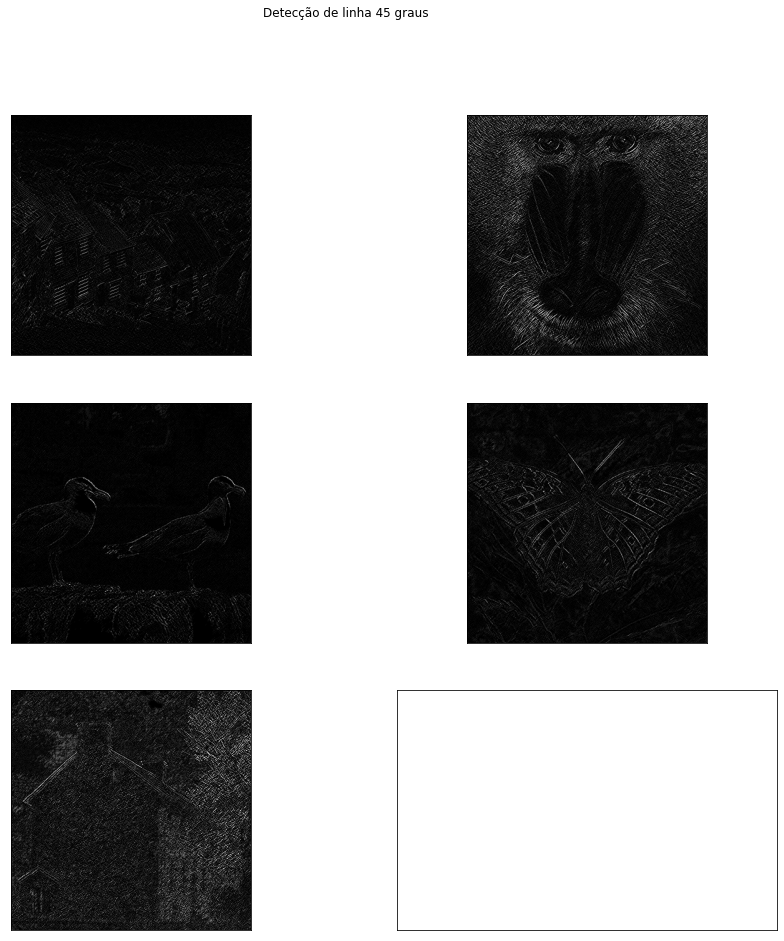

In [18]:
_filter = 'h7'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Detecção de linha 45 graus",_filters[_filter],metadata=metadata)

### Deteção de linha
O próximo filtro tem a propriedade de identificar linhas que estão a 135 graus. É notada nas imagens da árvore da casa e na imagem da cidade.

Filtro h8 
[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]]


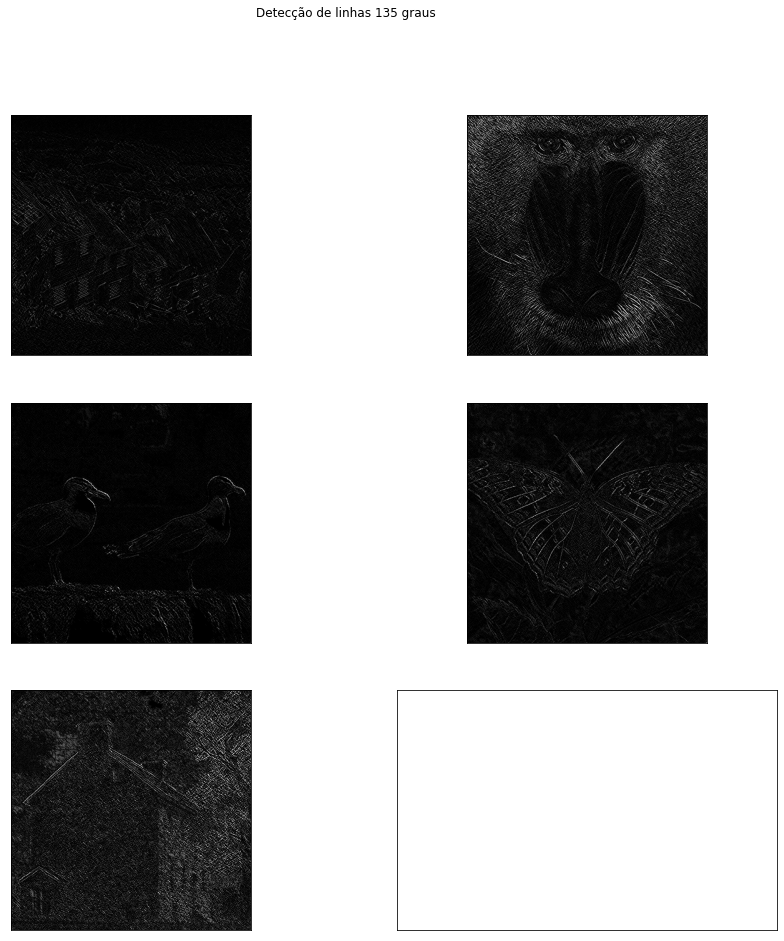

In [19]:
_filter = 'h8'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Detecção de linhas 135 graus",_filters[_filter],metadata=metadata)

### Gaussian blur
Para esse filtro de Gaussian blur considerou apenas a diagonal principal e tem-se apenas efeito da média da diagonal principal causando um efeito de enbaçamento de deslocamento. 

Filtro h9 
[[0.11111111 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.11111111 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.11111111 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.11111111 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.11111111 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.11111111
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.11111111 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11111111 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11111111]]


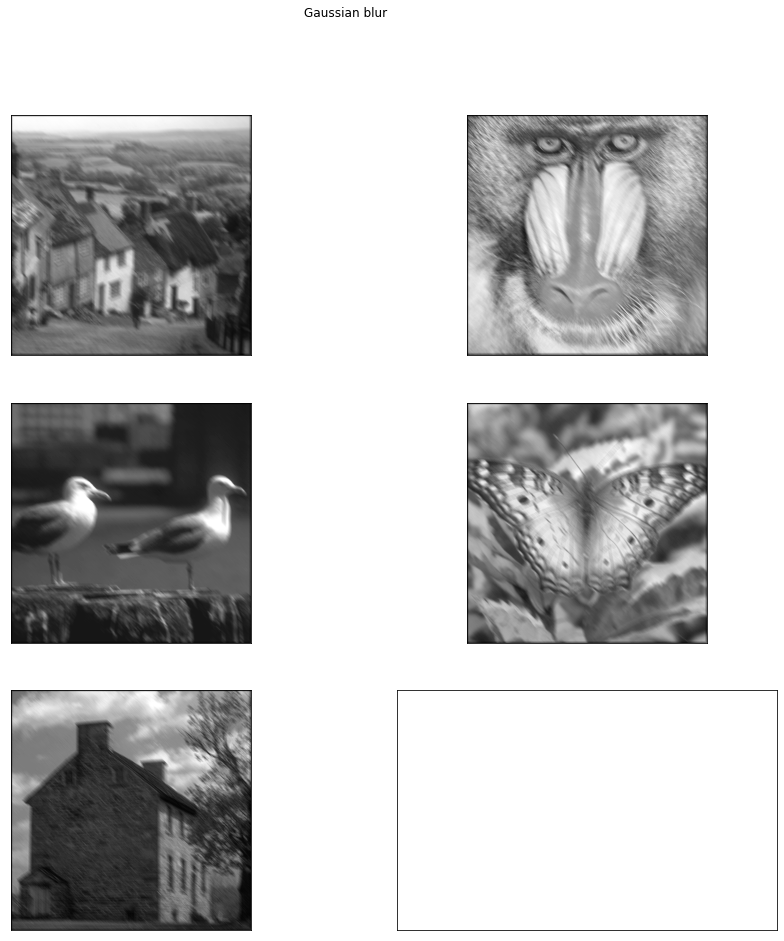

In [20]:
_filter = 'h9'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Gaussian blur",_filters[_filter],metadata=metadata)

### Filtro detecção de borda
Filtro de detecção de bordas com Laplaciano do gaussiano com vizinhança 8, considerando as diagonais.O filtro laplaciano sozinho tem uma desvantagem por ser extremamente sensível ao ruído. Então aplicando suavização antes do laplaciano faz melhorar o resultado das imagens processadas. Nesse caso por ser de vizinhança 8 os pixels da diagonais também tem peso deixando esse efeito contrária ao h1.

Filtro h10 
[[-0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  0.25   0.25   0.25  -0.125]
 [-0.125  0.25   1.     0.25  -0.125]
 [-0.125  0.25   0.25   0.25  -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125]]


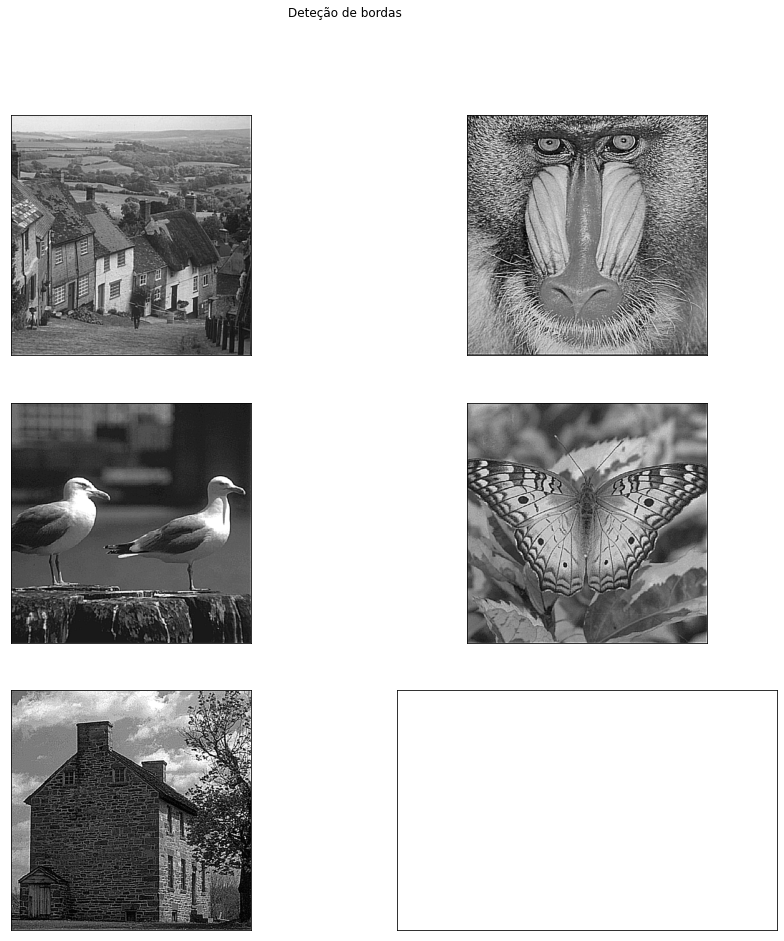

In [21]:
_filter = 'h10'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Deteção de bordas",_filters[_filter],metadata=metadata)

### Filtro detecção de borda
Soma das gradient x e y de Prewitt operator rotacionado 90 graus. Esse filtro tem propriedade de detectar a borda baseado na intensidade do pixel. Partes claras tendem a destacar mais.

Filtro h11 
[[-1. -1. -0.]
 [-1.  0.  1.]
 [-0.  1.  1.]]


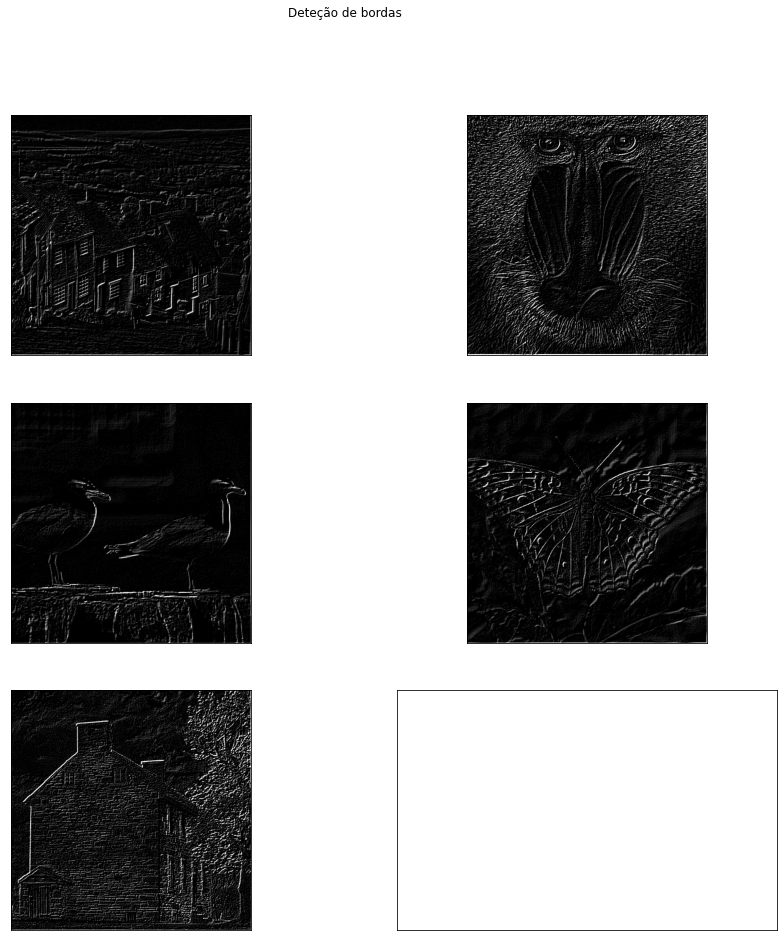

In [22]:
_filter = 'h11'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Deteção de bordas",_filters[_filter],metadata=metadata)

### Magnetude gradiente dos operadores de Sobel 
Fazendo a soma dos produtos ao quadrado dos filtro de sobel e tirando a raiz. É possível achar melhor as bordas que foram identificado melhor com filtro h3 e h4.

Filtro h12 
<function loading_filter.<locals>.<lambda> at 0x7f98fe10cd08>


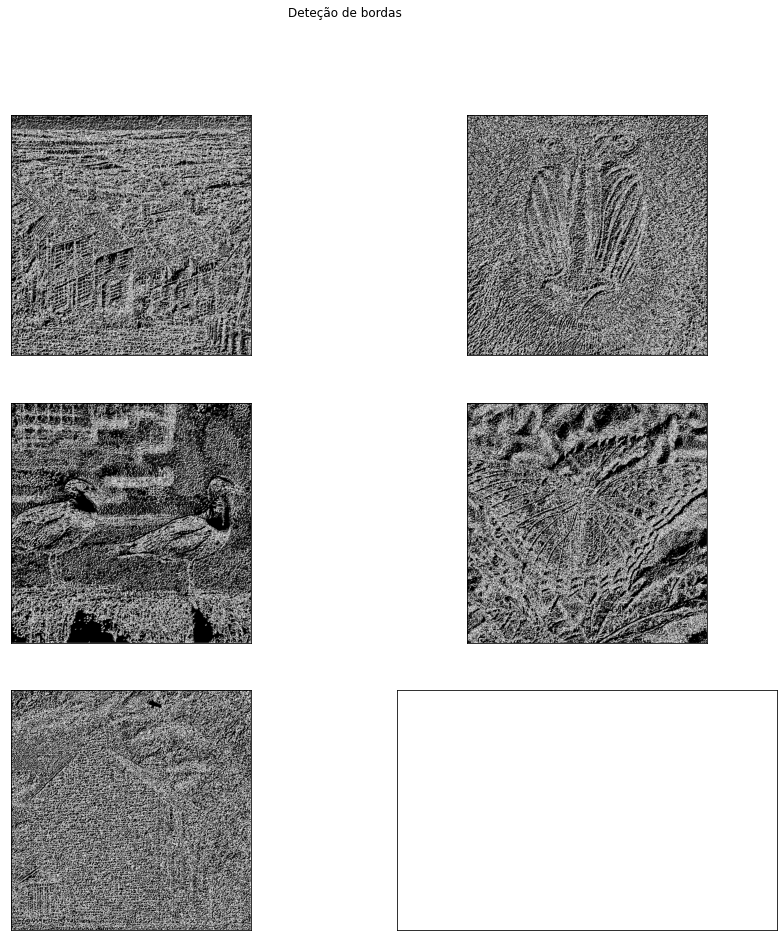

In [29]:
_filter = 'h12'
print(f"Filtro {_filter} \n{_filters[_filter]}")
metadata['filter'] = _filter
custom_plot(imgs,"Deteção de bordas",_filters[_filter],metadata=metadata)

In [30]:
for i in range(1,13):
  Path(f"results/h{i}").mkdir(parents=True, exist_ok=True)

In [31]:
for i in range(1,13):
  for j in Path('.').glob(f"*h{i}.png"):
    j.rename(f"results/h{i}/{j.name}")
for i in Path('.').glob(f"*.png"):
  i.rename(f"results/{i.name}")

In [32]:
if 'google.colab' in sys.modules:
  !zip -r /content/projeto1.zip results/
  from google.colab import files
  files.download("/content/projeto1.zip")
else:
  print("Funcionalidade disponível apenas no colab")

  adding: results/ (stored 0%)
  adding: results/h12/ (stored 0%)
  adding: results/h12/city_h12.png (deflated 0%)
  adding: results/h12/seagull_h12.png (deflated 0%)
  adding: results/h12/baboon_h12.png (deflated 0%)
  adding: results/h12/butterfly_h12.png (deflated 0%)
  adding: results/h12/house_h12.png (deflated 0%)
  adding: results/h6/ (stored 0%)
  adding: results/h6/house_h6.png (deflated 0%)
  adding: results/h6/butterfly_h6.png (deflated 0%)
  adding: results/h6/seagull_h6.png (deflated 1%)
  adding: results/h6/baboon_h6.png (deflated 0%)
  adding: results/h6/city_h6.png (deflated 0%)
  adding: results/h11/ (stored 0%)
  adding: results/h11/butterfly_h11.png (deflated 0%)
  adding: results/h11/city_h11.png (deflated 0%)
  adding: results/h11/baboon_h11.png (deflated 0%)
  adding: results/h11/house_h11.png (deflated 0%)
  adding: results/h11/seagull_h11.png (deflated 0%)
  adding: results/h9/ (stored 0%)
  adding: results/h9/baboon_h9.png (deflated 0%)
  adding: results/h9/cit

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Sharpening 
Esse efeito acontece subraindo da imagem original os bits embaçados. Para fazer o controle de quanto vai se retirado é feito produto com a porcentagem entre a imagem original e a imagem embaçada.
### Channel Interpolation 
Mudar a concentração de pixels de cada intensidade para direita mais intenso e esquerda menos intenso daquela tonalidade.  
Para fazer esse efeito precisa usar interp com a imagem vetorizada. 

https://en.wikipedia.org/wiki/Kernel_(image_processing)
https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04
https://iitmcvg.github.io/summer_school/Session3/
https://en.wikipedia.org/wiki/Prewitt_operator
https://aishack.in/tutorials/image-convolution-examples/
https://stackoverflow.com/questions/58477255/how-to-do-convolution-in-opencv

In [33]:
# Foi trocado o cv2.filter2D(img, -1, cv2.flip(_filter, -1), borderType=cv.BORDER_CONSTANT) para fazer a convolução 